In [2]:
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # 
import math 
import cv2 
from glob import glob
import itertools
# KERAS AND SKLEARN MODULES
#from keras.utils import np_utils
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import os
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils.np_utils import to_categorical
from PIL import Image
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from skimage.io import imread_collection
from tensorflow.keras import losses
from keras.layers import Dropout, Flatten,Activation
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers, optimizers

Firstly, let's select TensorFlow version 2.x in colab

In [3]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

UsageError: Line magic function `%tensorflow_version` not found.


In [4]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

Load the dataset


In [5]:
#from google.colab import drive
#drive.mount('/content/gdrive')

# Add path to the folder where your dataset files are

In [6]:
#import zfile
from zipfile import ZipFile
with ZipFile('train.zip', 'r') as z:
    z.extractall()



In [7]:
# Extracting the features and classes from training folder

X_train = []
y_train = []
train_path='train'


for subfolder in os.listdir(train_path): # print all folder names from train directory # 12 target classes found
    print(subfolder)

    for file in os.listdir(train_path+'/' +subfolder): # read & resize each image from train directory
        path = train_path+'/' +subfolder+ "/" + file
        im = cv2.imread(path)
        ims = cv2.resize(im,(128,128))
        ims = ims/255.
        X_train.append(ims)
        y_train.append(subfolder)

Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet


In [8]:
# print the total number of unique target classes of the images 
unique_count=np.unique(y_train)
total_img = len(unique_count)
print('Total number of target classes : ', total_img)

Total number of target classes :  12


In [9]:
X_train[0].shape

(128, 128, 3)

In [10]:
#see number of images in each lablel
images = np.array(X_train)
classes = np.array(y_train)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))

images shape:  (4750, 128, 128, 3)
classes shape:  (4750,)
number of Black-grass images is  -> 263
number of Sugar beet images is  -> 385
number of Charlock images is  -> 390
number of Scentless Mayweed images is  -> 516
number of Maize images is  -> 221
number of Cleavers images is  -> 287
number of Small-flowered Cranesbill images is  -> 496
number of Common wheat images is  -> 221
number of Fat Hen images is  -> 475
number of Common Chickweed images is  -> 611
number of Loose Silky-bent images is  -> 654
number of Shepherds Purse images is  -> 231


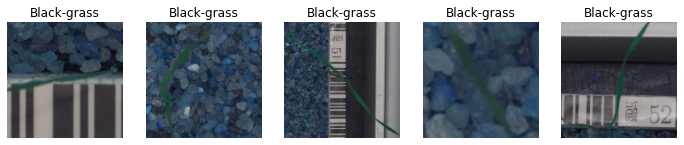

In [11]:
# visualizing the first 5 images

N=5  # Number of Images

plt.figure(figsize=(12, 8))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title("{}".format(y_train[i]))
    plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

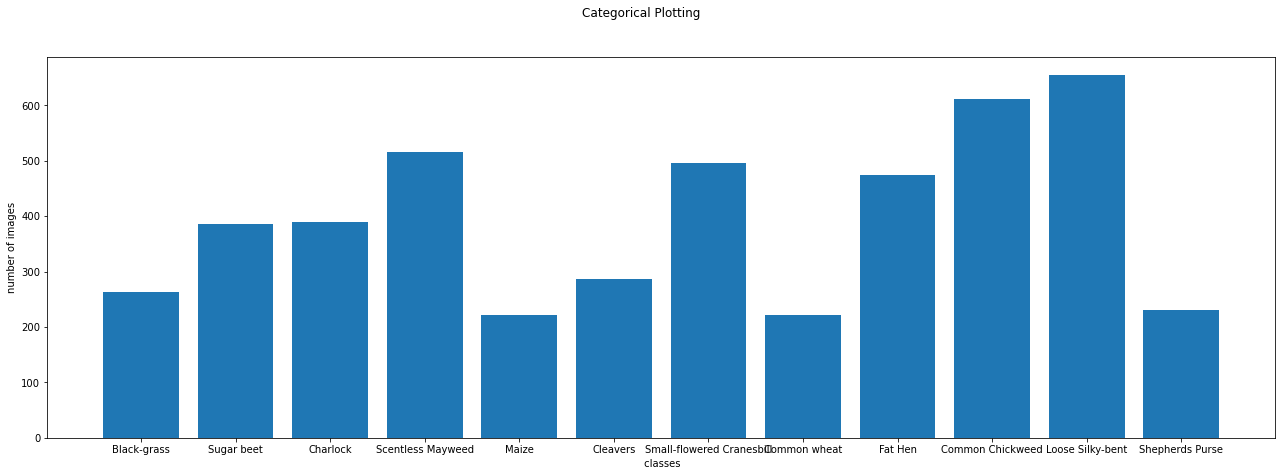

In [12]:
values =[]
labels=[]
for label in set(y_train):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [13]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

In [14]:
def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen

In [15]:
for indx, image in enumerate(X_train):
  try:
     X_train[indx] = segment(image)
      
  except:
    print(indx)
    continue
      

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [16]:
# preprocess target variables
y_train=np.array(y_train)
y_train.reshape(1,-1)

array([['Black-grass', 'Black-grass', 'Black-grass', ..., 'Sugar beet',
        'Sugar beet', 'Sugar beet']], dtype='<U25')

In [17]:
le_train=preprocessing.LabelEncoder()
y_train=le_train.fit_transform(y_train)

In [18]:
y_train

array([ 0,  0,  0, ..., 11, 11, 11], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split

X_train_SL, X_test_SL, y_train_SL, y_test_SL = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

print("Lenth of the X_train",len(X_train_SL))
print("Lenth of the X_test",len(X_test_SL))
print("Lenth of the y_train",len(y_train_SL))
print("Lenth of the y_test ",len(y_test_SL))

Lenth of the X_train 3800
Lenth of the X_test 950
Lenth of the y_train 3800
Lenth of the y_test  950


In [20]:
X_train_SL = np.array(X_train_SL)
X_test_SL = np.array(X_test_SL)
X_train_SL = X_train_SL.astype('float32')
X_test_SL = X_test_SL.astype('float32')

In [21]:
print("Shape of the X_train",X_train_SL.shape)
print("Shape of the X_test",X_test_SL.shape)
print("Shape of the y_train",y_train_SL.shape)
print("Shape of the y_test ",y_test_SL.shape)

Shape of the X_train (3800, 128, 128, 3)
Shape of the X_test (950, 128, 128, 3)
Shape of the y_train (3800,)
Shape of the y_test  (950,)


In [22]:
# reshape the X variables to fit SL model
flat_arr_size = len(X_train_SL[0])*len(X_train_SL[0][0])*len(X_train_SL[0][0][0])
X_train_SL = X_train_SL.reshape(len(X_train_SL),flat_arr_size)
X_test_SL = X_test_SL.reshape(len(X_test_SL),flat_arr_size)

In [23]:
print("Shape of the X_train",X_train_SL.shape)
print("Shape of the X_test",X_test_SL.shape)
print("Shape of the y_train",y_train_SL.shape)
print("Shape of the y_test ",y_test_SL.shape)

Shape of the X_train (3800, 49152)
Shape of the X_test (950, 49152)
Shape of the y_train (3800,)
Shape of the y_test  (950,)


In [24]:
# define support vector classifier# SVM - Model
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=3)

# fit model
svm.fit(X_train_SL,y_train_SL)

SVM_score=svm.score(X_train_SL,y_train_SL)
print('SVM Model train accuracy is: ',SVM_score)
# generate predictions
y_pred_svm = svm.predict(X_test_SL)



SVM Model train accuracy is:  1.0


In [25]:
# calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_svm_test = accuracy_score(y_test_SL, y_pred_svm)
print('SVM Model test accuracy is: ', accuracy_svm_test)

SVM Model test accuracy is:  0.5231578947368422


In [26]:
# Logistic Regression

from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier


LogR = LogisticRegression()
LogR.fit(X_train_SL, y_train_SL)

y_pred_train_LR=LogR.predict(X_train_SL)
LogR_Accuracy_Train = accuracy_score(y_true=y_train_SL, y_pred=y_pred_train_LR)
print("LogisticRegression-Train Accuracy : ", LogR_Accuracy_Train)

y_pred_test_LR = LogR.predict(X_test_SL)
LogR_Accuracy_Test = accuracy_score(y_test_SL,y_pred_test_LR)
print("LogisticRegression-Test Accuracy : ", LogR_Accuracy_Test)

LogisticRegression-Train Accuracy :  0.8686842105263158
LogisticRegression-Test Accuracy :  0.48210526315789476


In [27]:
#Naive Bayes model

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_SL, y_train_SL)

NB_train=nb.score(X_train_SL, y_train_SL)
NB_test=nb.score(X_test_SL, y_test_SL)
print(f"Naive Bayes model score on training data= {nb.score(X_train_SL, y_train_SL)}")
print(f"Naive Bayes model score on test data = {nb.score(X_test_SL, y_test_SL)}")

Naive Bayes model score on training data= 0.21921052631578947
Naive Bayes model score on test data = 0.16631578947368422


In [28]:
# KNN - Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_SL, y_train_SL)

y_pred_knn = KNN.predict(X_train_SL)
KNN_Accuracy_Train=accuracy_score(y_train_SL, y_pred_knn)
print("Train Accuracy of KNeighborsClassifier : ", KNN_Accuracy_Train)

y_pred_knn_test = KNN.predict(X_test_SL)
KNN_Accuracy_Test=accuracy_score(y_test_SL, y_pred_knn_test)
print("Test Accuracy of KNeighborsClassifier : ", KNN_Accuracy_Test)

Train Accuracy of KNeighborsClassifier :  0.5521052631578948
Test Accuracy of KNeighborsClassifier :  0.2505263157894737


In [29]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

# Model
model_DT=DecisionTreeClassifier(criterion='entropy',
                                splitter='best',
                                max_depth=5,
                                random_state = 100,
                                min_samples_leaf=5,)

model_DT.fit(X_train_SL, y_train_SL)

# Accuracy
DT_Train=model_DT.score(X_train_SL, y_train_SL)
DT_Test=model_DT.score(X_test_SL, y_test_SL)
# Output
print("Train Accuracy of DecisionTreeClassifier:",DT_Train)
print("Test Accuracy of DecisionTreeClassifier:",DT_Test)

Train Accuracy of DecisionTreeClassifier: 0.3394736842105263
Test Accuracy of DecisionTreeClassifier: 0.26105263157894737


In [30]:
# Supervised learning scores
summary_final = pd.DataFrame({'Model':['support vector classifier','LogisticRegression','GaussianNB', 'KNeighborsClassifier','DecisionTreeClassifier'],
                              'Training Score': [SVM_score,LogR_Accuracy_Train,NB_train,KNN_Accuracy_Train,DT_Train],
                              'Testing Score': [accuracy_svm_test,LogR_Accuracy_Test,NB_test,KNN_Accuracy_Test,DT_Test]
                             })
summary_final

Model  Training Score  Testing Score
0  support vector classifier        1.000000       0.523158
1         LogisticRegression        0.868684       0.482105
2                 GaussianNB        0.219211       0.166316
3       KNeighborsClassifier        0.552105       0.250526
4     DecisionTreeClassifier        0.339474       0.261053

Use neural networks for training

In [31]:
from sklearn.model_selection import train_test_split

X_train_ANN, X_test_ANN, y_train_ANN, y_test_ANN = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

print("Lenth of the X_train",len(X_train_ANN))
print("Lenth of the X_test",len(X_test_ANN))
print("Lenth of the y_train",len(y_train_ANN))
print("Lenth of the y_test ",len(y_test_ANN))

Lenth of the X_train 3800
Lenth of the X_test 950
Lenth of the y_train 3800
Lenth of the y_test  950


In [32]:
# Converting to array
X_train_NN = np.array(X_train_ANN)
X_train_NN.shape
X_test_NN = np.array(X_test_ANN)
X_test_NN.shape

(950, 128, 128, 3)

In [33]:
X_train_NN = X_train_NN.astype('float32')
X_train_NN = X_train_NN.reshape(X_train_NN.shape[0], 49152) # 49152 = 128 * 128 * 3
X_train_NN = X_train_NN / 255.

X_test_NN = X_test_NN.astype('float32')
X_test_NN = X_test_NN.reshape(X_test_NN.shape[0], 49152)
X_test_NN = X_test_NN / 255.

print('\nTraining data : ', X_train_NN.shape)  

print('\nTesting data : ', X_test_NN.shape) # 


Training data :  (3800, 49152)

Testing data :  (950, 49152)


In [34]:
# one hot encode target variables
y_train_NN = pd.get_dummies(y_train_ANN)
y_test_NN = pd.get_dummies(y_test_ANN)

In [35]:
# no.of classes
num_classes = y_train_NN.shape[1]
num_classes

12

In [36]:
y_test_NN[4] #checking a Y varibale after encoding

0      0
1      0
2      0
3      0
4      0
      ..
945    0
946    0
947    0
948    0
949    1
Name: 4, Length: 950, dtype: uint8

In [37]:
from sklearn.preprocessing import StandardScaler
# Normalizing the input features
X_train_NN = StandardScaler().fit_transform(X_train_NN) 
X_test_NN = StandardScaler().fit_transform(X_test_NN)

In [38]:
print("Shape of the X_train",X_train_NN.shape)
print("Shape of the X_test",X_test_NN.shape)
print("Shape of the y_train",y_train_NN.shape)
print("Shape of the y_test ",y_test_NN.shape)

Shape of the X_train (3800, 49152)
Shape of the X_test (950, 49152)
Shape of the y_train (3800, 12)
Shape of the y_test  (950, 12)


In [39]:
X_train_NN.shape[1:]

(49152,)

In [40]:
# create Artificial Neural Network model
model = Sequential()  
model.add(BatchNormalization(input_shape = (49152,)))  
    
model.add(Dense(256, activation='relu')) 
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
    
# Compile model

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) ### Loss function = Categorical cross entropy

# Fit the model
model.fit(X_train_NN, y_train_NN, validation_data=(X_test_NN, y_test_NN), epochs=10, batch_size=50, verbose=1)

Epoch 1/10
76/76 [==============================] - 7s 84ms/step - loss: 2.1800 - accuracy: 0.2492 - val_loss: 1.8604 - val_accuracy: 0.3758
Epoch 2/10
76/76 [==============================] - 6s 82ms/step - loss: 1.4838 - accuracy: 0.5155 - val_loss: 1.6188 - val_accuracy: 0.4474
Epoch 3/10
76/76 [==============================] - 6s 83ms/step - loss: 1.0304 - accuracy: 0.6784 - val_loss: 1.5321 - val_accuracy: 0.4874
Epoch 4/10
76/76 [==============================] - 6s 80ms/step - loss: 0.6610 - accuracy: 0.7945 - val_loss: 1.6747 - val_accuracy: 0.4621
Epoch 5/10
76/76 [==============================] - 6s 81ms/step - loss: 0.4556 - accuracy: 0.8739 - val_loss: 1.6816 - val_accuracy: 0.4979
Epoch 6/10
76/76 [==============================] - 6s 81ms/step - loss: 0.2849 - accuracy: 0.9332 - val_loss: 1.9046 - val_accuracy: 0.4842
Epoch 7/10
76/76 [==============================] - 6s 79ms/step - loss: 0.1892 - accuracy: 0.9600 - val_loss: 1.7964 - val_accuracy: 0.5232
Epoch 8/10
76

In [41]:
score_NN = model.evaluate(X_train_NN, y_train_NN, verbose=1)
print('Loss: {}, Accuracy: {}'.format(score_NN[0], score_NN[1]))

119/119 [==============================] - 2s 17ms/step - loss: 0.0198 - accuracy: 0.9995
Loss: 0.019750498235225677, Accuracy: 0.9994736909866333


In [42]:
score_NN_test = model.evaluate(X_test_NN, y_test_NN)
print('Loss: {}, Accuracy: {}'.format(score_NN_test[0], score_NN_test[1]))

30/30 [==============================] - 1s 17ms/step - loss: 1.9035 - accuracy: 0.5242
Loss: 1.9034688472747803, Accuracy: 0.524210512638092


Use CNN for training

In [43]:
from sklearn.model_selection import train_test_split

X_train_CNN, X_test_CNN, y_train_CNN, y_test_CNN = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

print("Lenth of the X_train",len(X_train_CNN))
print("Lenth of the X_test",len(X_test_CNN))
print("Lenth of the y_train",len(y_train_CNN))
print("Lenth of the y_test ",len(y_test_CNN))

Lenth of the X_train 3800
Lenth of the X_test 950
Lenth of the y_train 3800
Lenth of the y_test  950


In [44]:
X_train_CNN_01 = np.array(X_train_CNN)
X_train_CNN_01.shape
X_test_CNN_01 = np.array(X_test_CNN)
X_test_CNN_01.shape

(950, 128, 128, 3)

In [45]:
y_train_CNN_encoded = pd.get_dummies(y_train_CNN)
y_test_CNN_encoded = pd.get_dummies(y_test_CNN)

In [46]:
y_train_CNN_encoded[:4]

0   1   2   3   4   5   6   7   8   9   10  11
0   0   0   0   0   0   0   0   0   0   1   0   0
1   0   0   0   0   0   0   1   0   0   0   0   0
2   0   0   0   0   0   0   0   0   0   0   1   0
3   0   0   0   0   0   0   0   0   1   0   0   0

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

model_cnn = Sequential()

model_cnn.add(BatchNormalization(input_shape = (128, 128, 3)))

model_cnn.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (128, 128, 3))) 
model_cnn.add(MaxPooling2D(pool_size = 2))

model_cnn.add(Convolution2D(filters = 64, kernel_size = 4, padding = 'same', activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size = 2))

model_cnn.add(Convolution2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size = 2))

model_cnn.add(Convolution2D(filters = 128, kernel_size = 2, padding = 'same', activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size = 2))

model_cnn.add(Flatten()) 

# fully connected layer
model_cnn.add(Dense(units = 128,activation = 'relu'))
model_cnn.add(Dense(units = 64, activation = 'relu'))
model_cnn.add(Dense(units = 32, activation = 'relu'))

model_cnn.add(Dense(units = 12, activation = 'softmax')) 

In [48]:
optimizer = Adam(learning_rate=0.001)
model_cnn.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)      

In [49]:
model_cnn.fit(X_train_CNN_01, y_train_CNN_encoded, epochs = 10, batch_size=50,validation_data = (X_test_CNN_01, y_test_CNN_encoded))

Epoch 1/10
76/76 [==============================] - 89s 1s/step - loss: 2.1803 - accuracy: 0.2408 - val_loss: 2.2974 - val_accuracy: 0.2484
Epoch 2/10
76/76 [==============================] - 89s 1s/step - loss: 1.4674 - accuracy: 0.4871 - val_loss: 2.1609 - val_accuracy: 0.2221
Epoch 3/10
76/76 [==============================] - 89s 1s/step - loss: 1.0540 - accuracy: 0.6347 - val_loss: 1.7295 - val_accuracy: 0.4147
Epoch 4/10
76/76 [==============================] - 87s 1s/step - loss: 0.7261 - accuracy: 0.7513 - val_loss: 1.5068 - val_accuracy: 0.4821
Epoch 5/10
76/76 [==============================] - 87s 1s/step - loss: 0.5827 - accuracy: 0.7834 - val_loss: 0.8424 - val_accuracy: 0.7168
Epoch 6/10
76/76 [==============================] - 92s 1s/step - loss: 0.4753 - accuracy: 0.8397 - val_loss: 0.8841 - val_accuracy: 0.7147
Epoch 7/10
76/76 [==============================] - 88s 1s/step - loss: 0.3801 - accuracy: 0.8658 - val_loss: 0.6730 - val_accuracy: 0.7811
Epoch 8/10
76/76 [==

In [50]:
CNN_train_scores = model_cnn.evaluate(X_train_CNN_01, y_train_CNN_encoded)
print('Loss: {}, Accuracy: {}'.format(CNN_train_scores[0], CNN_train_scores[1]))

119/119 [==============================] - 23s 193ms/step - loss: 0.2010 - accuracy: 0.9218
Loss: 0.20102879405021667, Accuracy: 0.921842098236084


In [51]:
CNN_test_scores=model_cnn.evaluate(X_test_CNN_01, y_test_CNN_encoded)
print('Loss: {}, Accuracy: {}'.format(CNN_test_scores[0], CNN_test_scores[1]))

30/30 [==============================] - 6s 202ms/step - loss: 0.7328 - accuracy: 0.7937
Loss: 0.7328463196754456, Accuracy: 0.793684184551239


In [52]:
summary_final_01 = pd.DataFrame({'Model':['support vector classifier','LogisticRegression','GaussianNB',
                                'KNeighborsClassifier','DecisionTreeClassifier', 'ANN','CNN'],
                              'Training Score': [SVM_score,LogR_Accuracy_Train,NB_train,KNN_Accuracy_Train,DT_Train,score_NN[1],CNN_train_scores[1]],
                              'Testing Score': [accuracy_svm_test,LogR_Accuracy_Test,NB_test,KNN_Accuracy_Test,DT_Test,score_NN_test[1],CNN_test_scores[1]]
                             })
summary_final_01

Model  Training Score  Testing Score
0  support vector classifier        1.000000       0.523158
1         LogisticRegression        0.868684       0.482105
2                 GaussianNB        0.219211       0.166316
3       KNeighborsClassifier        0.552105       0.250526
4     DecisionTreeClassifier        0.339474       0.261053
5                        ANN        0.999474       0.524211
6                        CNN        0.921842       0.793684

Observations:
After comparing all the three model (Supervised,NN & CNN),CNN performs well on testing data ,there was no over fitting.

Pickle the best performing model.

In [54]:
from tensorflow.keras.models import model_from_json

# Pickle model to JSON
pickle_CNN_model_json =model_cnn.to_json()
with open("model_cnn_pickle.json", "w") as json_file:
    json_file.write(pickle_CNN_model_json)

In [55]:
# Pickle weights to HDF5
model_cnn.save_weights("model_cnn_pickle.h5")
print("Saved model to disk")

Saved model to disk


Import the the image in the “ Prediction” folder to predict the class. Display the image. Use the best trained image classifier model to predict the class.

In [56]:
import os
import cv2
import numpy as np

Predict_Image_01 = []
#test_path='/content/gdrive/My Drive/Machine Learning/CV/CNN CV/Predict.png'
test_path='Predict.png'
# read an image from train directory
P = cv2.imread(test_path)
P = cv2.resize(P, (128, 128))
Predict_Image_01.append(P)

PI=np.array(Predict_Image_01)

Predict_Image_01=PI.reshape(1,128,128,3)

In [57]:
Predict_Image_01.shape

(1, 128, 128, 3)

In [58]:
from PIL import Image  
  
# creating a object  
im = Image.open(r"Predict.png")  
im.show() 

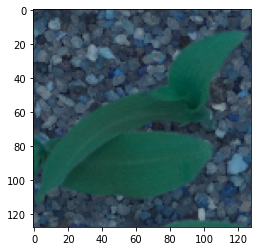

In [59]:
plt.imshow(Predict_Image_01[0])

In [60]:
result=model_cnn.predict(Predict_Image_01)
result 

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [61]:
result_final=np.argmax(result)
result_final

5

In [62]:
le_train.classes_

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')

In [63]:
actual_classes=['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet']

In [64]:
actual_classes[7] #Image belongs to the class "Maize"

'Maize'

Part 2

TASK:

Explain in depth why CNN out performs neural networks which in turn out perform supervised learning. 

models when it comes to image classification.
CNN reduce the number of units in the network, which means fewer parameters to learn and reduced chance of overfitting.

Also, they consider the context information in small neighbourhoods.

This feature is very important to achieve a better prediction in data like images.

Features can be text, date/time, categorical, and continuous variables. but for a machine learning model, the dataset needs to be processed in the form of numerical vectors to train it using an ML algorithm.

The main advantage of CNN compared to its predecessors is that it automatically detects the important features without any human supervision. This is why CNN would be an ideal solution to computer vision and image classification problems

Convolutional layers have several advantages such as feature learning, weight parameter sharing, computational efficiency, much better feature extraction then traditional fully connected layers.

With little dependence on pre processing, this algorithm requires less human effort. It is actually a self learner, which makes the pre processing phase, easier.

CNN has some components and parameters which works well with images. That's why it's mainly used to analyse and predict images

In general, CNN tends to be a more powerful and accurate way of solving classification problems. ANN is still dominant for problems where datasets are limited and image inputs are not necessary

Part 3

In [65]:
#import zfile
from zipfile import ZipFile
with ZipFile('Cars Images-20210710T141526Z-001.zip', 'r') as z:
    z.extractall()


In [66]:
path='Cars Images/*.jpg'

In [67]:
# extracting file name # 15 Images found
folder='Cars Images'
for i in os.listdir(folder):
    print(i)

00001.jpg
00002.jpg
00003.jpg
00004.jpg
00005.jpg
00006.jpg
00007.jpg
00008.jpg
00009.jpg
00010.jpg
00011.jpg
00012.jpg
00013.jpg
00014.jpg
00015.jpg


In [68]:
Imgs = imread_collection(path) #creating a collection for images in the given folder 

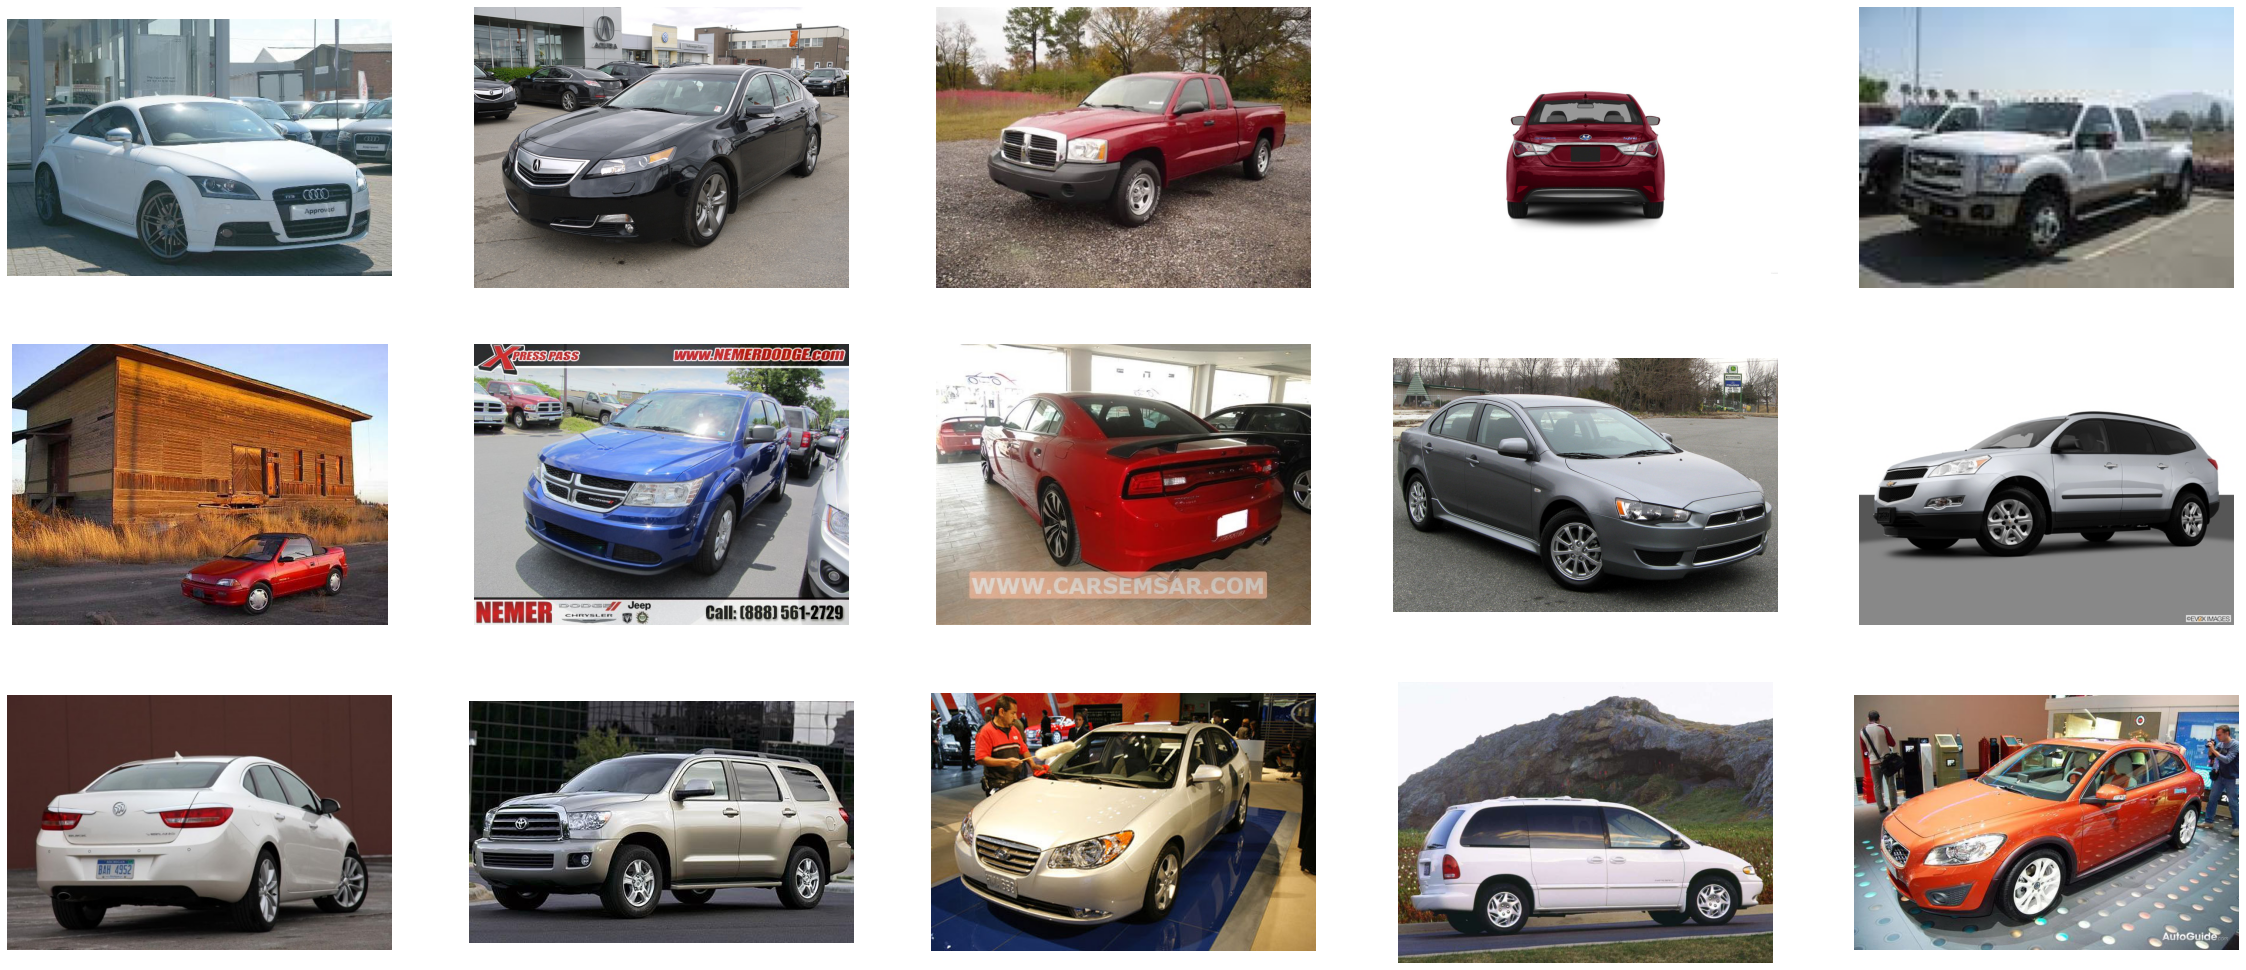

In [69]:
# visualizing the images in the dataset
n=15
plt.figure(figsize=(40, 30))
for ii in range(n):
    plt.subplot(5, 5, ii+1)
    plt.imshow(Imgs[ii], cmap="gray")  # greens, reds, blues, rgb
    plt.axis('off')
plt.show()

In [73]:
# Manually Tag annotations on an excel file
# import the excel file 
annot=pd.read_excel('Cars_Annotations.xlsx')

In [74]:
annot.head()

Image    Brand  Color
0  00001.jpg     Audi  White
1  00002.jpg    Acura  Black
2  00003.jpg    Dodge    Red
3  00004.jpg  Hyundai    Red
4  00005.jpg     Ford  White

In [75]:
car_Color=annot['Color']
car_Color

0      White
1      Black
2        Red
3        Red
4      White
5        Red
6       Blue
7        Red
8       Gray
9     Silver
10     White
11      Gray
12     White
13     White
14       Red
Name: Color, dtype: object

In [76]:
car_brand=annot['Brand']
car_brand

0           Audi
1          Acura
2          Dodge
3        Hyundai
4           Ford
5        Unknown
6          Dodge
7          Dodge
8     Mitsubishi
9      Chevrolet
10         Scoda
11        Toyota
12       Hyundai
13       Unknown
14         Volvo
Name: Brand, dtype: object

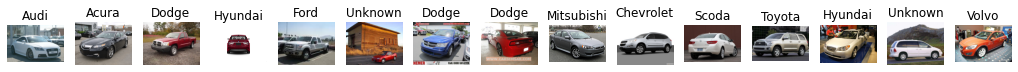

In [78]:
# visualizing the images in the dataset and their labels

N=15  

plt.figure(figsize=(N+3, 1))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(Imgs[i], cmap="gray")  # greens, reds, blues, rgb
    plt.title("{}".format(car_brand[i]))
    plt.axis('off')
plt.show()

Challenges faced during this task:

Manually classifying the car names is a time consuming activity and its very difficult to predict some images as they were in different positions and some Images are not clear

Manual tagging is time consuming If the volume of the data is high

Part 4


In [80]:
!pip install tflearn

  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127304 sha256=6ac643d4437f47ad0315cb6d7db9b792ee1718bcfe1a869bd55cd2512dd66b66
  Stored in directory: c:\users\anubgupta\appdata\local\pip\cache\wheels\65\9b\15\cb1e6b279c14ed897530d15cfd7da8e3df8a947e593f5cfe59
Successfully built tflearn


In [81]:
# Import oxflower17 images 

import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [82]:
XX,yy=oxflower17.load_data()

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [83]:
#  shape and size of each image
print(' Image shape : ', XX.shape[1:3])

 Image shape :  (224, 224)


In [84]:
# number of channels of each image 
print(' Channel : ', XX.shape[3])

 Channel :  3


In [85]:
XX.shape # Contains 1360 Images, the shape is 224x224 And there are 3 channels

(1360, 224, 224, 3)

In [86]:
yy.shape # 1d array with 1360 target classes

(1360,)

In [87]:
# print the total number of unique target classes of the images 
unique_count_flow=np.unique(yy)
print(unique_count_flow)
total_flow = len(unique_count_flow)
print('Total number of  target classes : ', total_flow)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Total number of  target classes :  17


In [88]:
#see number of images in each lablel
images = np.array(XX)
classes = np.array(yy)
print("images shape: ", images.shape)
print("Target shape: ", classes.shape)
  
for labels in set(classes):

  print("Number of images in folder {} is  -> {}".format(
        labels, 
        len(images[classes == labels])))

images shape:  (1360, 224, 224, 3)
Target shape:  (1360,)
Number of images in folder 0 is  -> 80
Number of images in folder 1 is  -> 80
Number of images in folder 2 is  -> 80
Number of images in folder 3 is  -> 80
Number of images in folder 4 is  -> 80
Number of images in folder 5 is  -> 80
Number of images in folder 6 is  -> 80
Number of images in folder 7 is  -> 80
Number of images in folder 8 is  -> 80
Number of images in folder 9 is  -> 80
Number of images in folder 10 is  -> 80
Number of images in folder 11 is  -> 80
Number of images in folder 12 is  -> 80
Number of images in folder 13 is  -> 80
Number of images in folder 14 is  -> 80
Number of images in folder 15 is  -> 80
Number of images in folder 16 is  -> 80


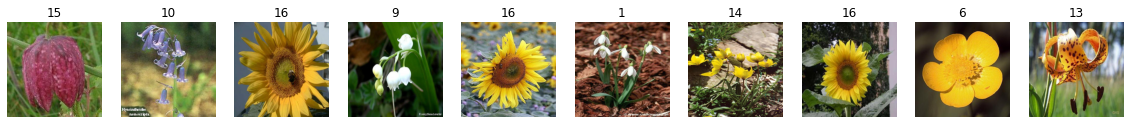

In [89]:
#Display first 10 images in the dataset
n=10
plt.figure(figsize=(20,5))
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(XX[i]) 
    plt.title("{}".format(yy[i]))
    plt.axis('off')
plt.show()

In [90]:
##Display the  first 10 Labels in the dataset 

nj=10
plt.figure(figsize=(nj,1))
for j in range(nj):
 print('label for each of the above image: %s' % (yy[j]))

label for each of the above image: 15
label for each of the above image: 10
label for each of the above image: 16
label for each of the above image: 9
label for each of the above image: 16
label for each of the above image: 1
label for each of the above image: 14
label for each of the above image: 16
label for each of the above image: 6
label for each of the above image: 13


<Figure size 720x72 with 0 Axes>

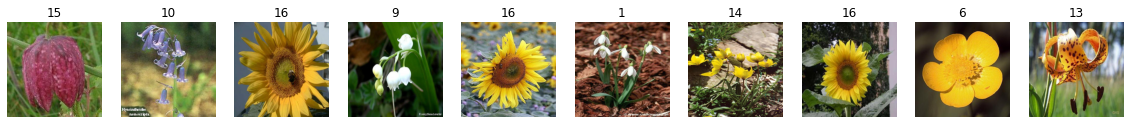

label for each of the above image: [15 10 16  9 16  1 14 16  6 13]


In [91]:
#Display the  first 10 images in the dataset and their labels 
n=10
plt.figure(figsize=(20,5))
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(XX[i], cmap="gray")  # greens, reds, blues, rgb
    plt.title("{}".format(yy[i]))
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (yy[0:n]))

Image width: 530
Image height: 500


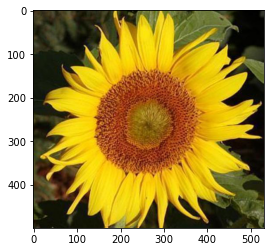

In [111]:
# # Display the first image from class = 0  
im = Image.open(r"17flowers/jpg/9/image_0761.jpg")  
plt.imshow(im)
width, height = im.size
print("Image width:",width)    
print("Image height:",height)

EMBOSS


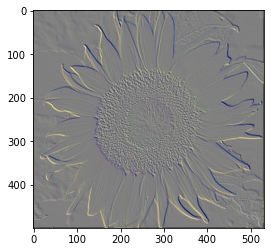

CONTOUR


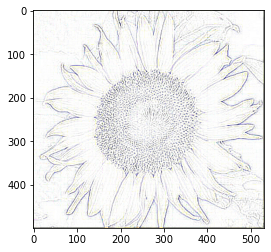

BLUR


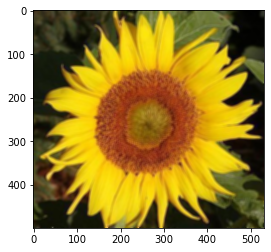

SMOOTH


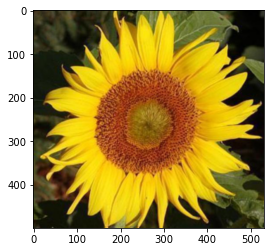

In [112]:
# Apply the edge detection or Blur or Emboss filter on the image
#Import required image modules
from PIL import Image, ImageFilter

#Import all the enhancement filter from pillow
from PIL.ImageFilter import ( BLUR,CONTOUR,EMBOSS,SMOOTH)
                   
#Create image object
# img = Image.open(Image_name)
#Applying the blur filter
img1 = im.filter(EMBOSS)
print("EMBOSS")
plt.imshow(img1)
plt.show()

img2 = im.filter(CONTOUR)
print("CONTOUR")
plt.imshow(img2)
plt.show()

img3 = im.filter(BLUR)
print("BLUR")
plt.imshow(img3)
plt.show()

img3 = im.filter(SMOOTH)
print("SMOOTH")
plt.imshow(img3)
plt.show()

In [113]:
Y_encoded = to_categorical(yy)
Y_encoded.shape

(1360, 17)

In [114]:
Y_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [115]:
# Split the data into train and test 

X_train_flow,X_test_flow,y_train_flow,y_test_flow = train_test_split(XX, yy, test_size=0.2, random_state=5)

In [116]:
# Convert all images to float 32 format and reshape

X_train_flow_SL = X_train_flow.astype('float32')
X_train_flow_SL = X_train_flow_SL.reshape(X_train_flow_SL.shape[0], 150528) # 49152 = 224 * 224 * 3
X_train_flow_SL = X_train_flow_SL / 255.

X_test_flow_SL = X_test_flow.astype('float32')
X_test_flow_SL = X_test_flow_SL.reshape(X_test_flow_SL.shape[0], 150528)
X_test_flow_SL = X_test_flow_SL / 255.

print('\nTraining data : ', X_train_flow_SL.shape)  

print('\nTesting data : ', X_test_flow_SL.shape) # 


Training data :  (1088, 150528)

Testing data :  (272, 150528)


In [117]:
# Print final shape and size of Train and test data  

print(' X Train data : ', X_train_flow_SL.shape,)

print(' Y Train data : ', y_train_flow.shape)

print(' X Test data : ', X_test_flow_SL.shape)

print(' Y Test data : ', y_test_flow.shape)

 X Train data :  (1088, 150528)
 Y Train data :  (1088,)
 X Test data :  (272, 150528)
 Y Test data :  (272,)


In [118]:
# Logistic Regression

from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier


LogR_flow = LogisticRegression()
LogR_flow.fit(X_train_flow_SL, y_train_flow)

y_pred_lg_flow=LogR_flow.predict(X_train_flow_SL)
LogR_Accuracy_Train_flow = accuracy_score(y_train_flow,y_pred_lg_flow)
print("Train Accuracy of LogisticRegression: ", LogR_Accuracy_Train_flow)

y_pred_lg_test_flow = LogR_flow.predict(X_test_flow_SL)
LogR_Accuracy_Test_flow = accuracy_score(y_test_flow,y_pred_lg_test_flow)
print("Test Accuracy of LogisticRegression: ", LogR_Accuracy_Test_flow)

Train Accuracy of LogisticRegression:  0.48713235294117646
Test Accuracy of LogisticRegression:  0.3713235294117647


In [119]:
from sklearn.model_selection import train_test_split # using encoded target class #Y_encoded

X_train_NN_fl1, X_test_NN_fl1, y_train_NN_fl1, y_test_NN_fl1 = train_test_split(XX, Y_encoded, test_size=0.2, random_state=2)

print("Lenth of the X_train",len(X_train_NN_fl1))
print("Lenth of the X_test",len(X_test_NN_fl1))
print("Lenth of the y_train",len(y_train_NN_fl1))
print("Lenth of the y_test ",len(y_test_NN_fl1))

Lenth of the X_train 1088
Lenth of the X_test 272
Lenth of the y_train 1088
Lenth of the y_test  272


In [120]:
# Shape of Train and Test dataX_test_NN_fl1
print("Shape of the X_train",X_train_NN_fl1.shape)
print("Shape of the X_test",X_test_NN_fl1.shape)
print("Shape of the y_train",y_train_NN_fl1.shape)
print("Shape of the y_test ",y_test_NN_fl1.shape)

Shape of the X_train (1088, 224, 224, 3)
Shape of the X_test (272, 224, 224, 3)
Shape of the y_train (1088, 17)
Shape of the y_test  (272, 17)


In [121]:
# no.of classes
num_classes = y_train_NN_fl1.shape[1]
num_classes

17

In [122]:
y_train_NN_fl1[2]# checking random Y value

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [123]:
#reshape and normalise X features
X_train_NN_fl1 = X_train_NN_fl1.astype('float32')
X_train_NN_fl1 = X_train_NN_fl1.reshape(X_train_NN_fl1.shape[0], 150528) # 150528 = 224 * 224 * 3
X_train_NN_fl1 = X_train_NN_fl1 / 255.

X_test_NN_fl1 = X_test_NN_fl1.astype('float32')
X_test_NN_fl1 = X_test_NN_fl1.reshape(X_test_NN_fl1.shape[0], 150528)
X_test_NN_fl1 = X_test_NN_fl1 / 255.

print('\nTraining data : ', X_train_NN_fl1.shape)  

print('\nTesting data : ', X_test_NN_fl1.shape) 


Training data :  (1088, 150528)

Testing data :  (272, 150528)


In [124]:
print("Shape of the X_train",X_train_NN_fl1.shape)
print("Shape of the X_test",X_test_NN_fl1.shape)
print("Shape of the y_train",y_train_NN_fl1.shape)
print("Shape of the y_test ",y_test_NN_fl1.shape)

Shape of the X_train (1088, 150528)
Shape of the X_test (272, 150528)
Shape of the y_train (1088, 17)
Shape of the y_test  (272, 17)


In [125]:
### define model
model_NN_flow1 = Sequential()  
model_NN_flow1.add(BatchNormalization(input_shape = (150528,)))  # Batch_Norm Layer
    
model_NN_flow1.add(Dense(256, activation='relu')) # Dense units , Relu activation
model_NN_flow1.add(Dense(64, activation='relu'))
model_NN_flow1.add(Dense(64, activation='relu'))
model_NN_flow1.add(Dense(32, activation='relu'))
model_NN_flow1.add(Dense(num_classes, activation='softmax'))# softmax O/P activation 

In [126]:
# Compile model

model_NN_flow1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Fit the model
model_NN_flow1.fit(X_train_NN_fl1, y_train_NN_fl1,validation_data=(X_test_NN_fl1,y_test_NN_fl1), epochs=10, batch_size=50, verbose=1)

Train on 1088 samples, validate on 272 samples
Epoch 1/10
1088/1088 [==============================] - 4s 4ms/sample - loss: 2.6018 - acc: 0.1939 - val_loss: 2.8348 - val_acc: 0.0515
Epoch 2/10
1088/1088 [==============================] - 5s 5ms/sample - loss: 2.0213 - acc: 0.3925 - val_loss: 2.8270 - val_acc: 0.1176
Epoch 3/10
1088/1088 [==============================] - 5s 5ms/sample - loss: 1.5153 - acc: 0.5358 - val_loss: 2.8260 - val_acc: 0.0588
Epoch 4/10
1088/1088 [==============================] - 5s 5ms/sample - loss: 1.0369 - acc: 0.6792 - val_loss: 3.0791 - val_acc: 0.0809
Epoch 5/10
1088/1088 [==============================] - 5s 5ms/sample - loss: 0.7160 - acc: 0.7776 - val_loss: 2.8869 - val_acc: 0.0515
Epoch 6/10
1088/1088 [==============================] - 5s 5ms/sample - loss: 0.4801 - acc: 0.8658 - val_loss: 3.1520 - val_acc: 0.0846
Epoch 7/10
1088/1088 [==============================] - 5s 5ms/sample - loss: 0.3973 - acc: 0.8842 - val_loss: 3.2677 - val_acc: 0.0846
E

In [127]:
score_NN_flow = model_NN_flow1.evaluate(X_train_NN_fl1, y_train_NN_fl1, verbose=1)
print('Loss: {}, NN train Accuracy: {}'.format(score_NN_flow[0], score_NN_flow[1]))

Loss: 3.0226083713419296, NN train Accuracy: 0.10661764442920685


In [128]:
score_NN_test_flow = model_NN_flow1.evaluate(X_test_NN_fl1,y_test_NN_fl1)
print('Loss: {}, NN test Accuracy: {}'.format(score_NN_test_flow[0], score_NN_test_flow[1]))

Loss: 3.346737875657923, NN test Accuracy: 0.08455882221460342


Use CNN for training

In [129]:
from sklearn.model_selection import train_test_split

X_train_CNN_flow, X_test_CNN_flow, y_train_CNN_flow, y_test_CNN_flow = train_test_split(XX,yy, test_size=0.2, random_state=2)

print("Lenth of the X_train",len(X_train_CNN_flow))
print("Lenth of the X_test",len(X_test_CNN_flow))
print("Lenth of the y_train",len(y_train_CNN_flow))
print("Lenth of the y_test ",len(y_test_CNN_flow))

Lenth of the X_train 1088
Lenth of the X_test 272
Lenth of the y_train 1088
Lenth of the y_test  272


In [130]:
y_train_CNN_encoded_flow = pd.get_dummies(y_train_CNN_flow)
y_test_CNN_encoded_flow= pd.get_dummies(y_test_CNN_flow)
y_test_CNN_encoded_flow[:4]

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
2   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
3   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0

In [131]:
y_test_CNN_encoded_flow.shape

(272, 17)

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model_cnn architecture building
model_cnn_flow = Sequential()

model_cnn_flow.add(BatchNormalization(input_shape = (224, 224, 3)))

model_cnn_flow.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (224, 224, 3))) 
model_cnn_flow.add(MaxPooling2D(pool_size = 2))

model_cnn_flow.add(Convolution2D(filters = 64, kernel_size = 4, padding = 'same', activation = 'relu'))
model_cnn_flow.add(MaxPooling2D(pool_size = 2))

model_cnn_flow.add(Convolution2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_cnn_flow.add(MaxPooling2D(pool_size = 2))

model_cnn_flow.add(Convolution2D(filters = 128, kernel_size = 2, padding = 'same', activation = 'relu'))
model_cnn_flow.add(MaxPooling2D(pool_size = 2))

model_cnn_flow.add(Flatten()) 

# fully connected layer
model_cnn_flow.add(Dense(units = 224,activation = 'relu'))
model_cnn_flow.add(Dense(units = 128, activation = 'relu'))
model_cnn_flow.add(Dense(units = 64, activation = 'relu'))
model_cnn_flow.add(Dense(units = 32, activation = 'relu'))

model_cnn_flow.add(Dense(units = 17, activation = 'softmax')) 

In [133]:
from tensorflow.keras.optimizers import Adam

model_cnn_flow.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_cnn_flow.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 111, 111, 64)      32832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 128)      

In [134]:
model_cnn_flow.fit(X_train_CNN_flow, y_train_CNN_encoded_flow, epochs = 30, batch_size=50,validation_data = (X_test_CNN_flow, y_test_CNN_encoded_flow))

Train on 1088 samples, validate on 272 samples
Epoch 1/30
1088/1088 [==============================] - 79s 72ms/sample - loss: 2.8255 - acc: 0.0625 - val_loss: 2.8278 - val_acc: 0.0662
Epoch 2/30
1088/1088 [==============================] - 77s 71ms/sample - loss: 2.7957 - acc: 0.0818 - val_loss: 2.8133 - val_acc: 0.0772
Epoch 3/30
1088/1088 [==============================] - 73s 67ms/sample - loss: 2.7442 - acc: 0.0947 - val_loss: 2.7811 - val_acc: 0.0882
Epoch 4/30
1088/1088 [==============================] - 76s 70ms/sample - loss: 2.6568 - acc: 0.1268 - val_loss: 2.6836 - val_acc: 0.1324
Epoch 5/30
1088/1088 [==============================] - 80s 74ms/sample - loss: 2.5011 - acc: 0.1544 - val_loss: 2.5605 - val_acc: 0.1434
Epoch 6/30
1088/1088 [==============================] - 77s 71ms/sample - loss: 2.3406 - acc: 0.2353 - val_loss: 2.4330 - val_acc: 0.1875
Epoch 7/30
1088/1088 [==============================] - 78s 71ms/sample - loss: 2.1886 - acc: 0.2721 - val_loss: 2.2731 - val

In [135]:
CNN_train_scores_flow = model_cnn_flow.evaluate(X_train_CNN_flow, y_train_CNN_encoded_flow)
print('Loss: {}, Accuracy: {}'.format(CNN_train_scores_flow[0], CNN_train_scores_flow[1]))

Loss: 0.34508763648131313, Accuracy: 0.8832720518112183


In [136]:
CNN_test_scores_flow=model_cnn_flow.evaluate(X_test_CNN_flow, y_test_CNN_encoded_flow)
print('Loss: {}, Accuracy: {}'.format(CNN_test_scores_flow[0], CNN_test_scores_flow[1]))

Loss: 1.830149720696842, Accuracy: 0.5183823704719543


Use various CNN with transferred learning models for training

In [178]:
def normalize_vgg16(img):

  #Normalize for VGG16
  return tf.keras.applications.vgg16.preprocess_input(img)

In [179]:
#Define Training Data Generator with augmentations
train_datagen66 = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                preprocessing_function=normalize_vgg16) #Normalize the data accordingly

#Define Test Data Generator with NO augmentations
test_datagen66 = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=normalize_vgg16) #Normalize the data accordingly

In [180]:
# Using ImageDataGenerator for agumentation and to avoid over fitting
from keras.preprocessing.image import ImageDataGenerator

image_datagen = ImageDataGenerator(rescale=1./255, 
                                   zoom_range=0.2, 
                                   rotation_range=50,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   horizontal_flip=True, 
                                   validation_split=0.2)

In [181]:
#Build training generator. 
train_generator = image_datagen.flow_from_directory('17flowers/jpg',
                                                    target_size=(224,224),
                                                    subset='training',
                                                    batch_size=32)

#Build test generator
test_generator = image_datagen.flow_from_directory('17flowers/jpg',
                                                   target_size=(224,224),                                                   
                                                   subset='validation',
                                                   batch_size=32)

Found 1088 images belonging to 17 classes.
Found 272 images belonging to 17 classes.


In [182]:
# Loading pre trained model
tf.keras.backend.clear_session()
model_vgg16 = tf.keras.applications.VGG16(include_top=False,
                                       input_shape=(224,224,3),weights='imagenet')

In [183]:
len(model_vgg16.layers)

19

In [184]:
#Unfreezing all layers after layer#
for layer in model_vgg16.layers:
    layer.trainable = False
#get Output layer of Pre0trained model
x1 = model_vgg16.output

#Global average pool to reduce number of features and Flatten the output
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)

# Adding Dense layer
x3 = tf.keras.layers.Dense(128, activation='relu')(x2)

x4 = tf.keras.layers.Dropout(0.3)(x3) # Adding dopout to aviod over fitting
#Add output layer
prediction = tf.keras.layers.Dense(17,activation='softmax')(x4)

In [185]:
#Using Keras Model class
vgg16_model = tf.keras.models.Model(inputs=model_vgg16.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [186]:
#Compile the model
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [187]:
# Assigining callback function for early stoping and best learning rate

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("flower_vggg16.h5", monitor="val_loss", verbose=1, save_best_only=True, mode='max')

stop = EarlyStopping(monitor="val_loss", patience=5)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1)

callback_list = [stop, reduce_lr, checkpoint]

In [188]:
# Fitting the model
vgg16_model.fit_generator(train_generator,
                epochs=30,
                steps_per_epoch= 1088//64,
                validation_data=test_generator,
                validation_steps = 272//64, 
                callbacks=[callback_list])

Epoch 1/30
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 2.9225 - acc: 0.0790
Epoch 00001: val_loss improved from -inf to 2.70689, saving model to flower_vggg16.h5
17/17 [==============================] - 138s 8s/step - batch: 8.0000 - size: 32.0000 - loss: 2.9225 - acc: 0.0790 - val_loss: 2.7069 - val_acc: 0.1016 - lr: 0.0010
Epoch 2/30
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 2.6947 - acc: 0.1324
Epoch 00002: val_loss did not improve from 2.70689
17/17 [==============================] - 138s 8s/step - batch: 8.0000 - size: 32.0000 - loss: 2.6947 - acc: 0.1324 - val_loss: 2.5631 - val_acc: 0.3672 - lr: 0.0010
Epoch 3/30
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 2.5242 - acc: 0.2702
Epoch 00003: val_loss did not improve from 2.70689
17/17 [==============================] - 139s 8s/step - batch: 8.0000 - size: 32.0000 - loss: 2.5242 - acc: 0.2702 - va

In [189]:
train_acc = vgg16_model.evaluate(train_generator)
print('NN train Accuracy: {}'.format(train_acc[1]))

NN train Accuracy: 0.798713207244873


In [190]:
#  test score
test_acc = vgg16_model.evaluate(test_generator)
print('The testing accuracy is:', test_acc[1]*100, '%')

The testing accuracy is: 76.10294222831726 %


Alexnet- CNN transfer learning

In [191]:
XX_shap=np.array(XX)
XX_shap=XX_shap/255.

In [192]:
X_train_alx, X_test_alx, y_train_alx, y_test_alx = train_test_split(XX_shap,Y_encoded,test_size=0.2,random_state=2)

In [193]:
print("Shape of the X_train",X_train_alx.shape)
print("Shape of the X_test",X_test_alx.shape)
print("Shape of the y_train",y_train_alx.shape)
print("Shape of the y_test ",y_test_alx.shape)

Shape of the X_train (1088, 224, 224, 3)
Shape of the X_test (272, 224, 224, 3)
Shape of the y_train (1088, 17)
Shape of the y_test  (272, 17)


In [194]:
model_cnn_alex = Sequential()
model_cnn_alex.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (224,224,3)))
model_cnn_alex.add(MaxPooling2D(pool_size=(2,2)))


model_cnn_alex.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model_cnn_alex.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model_cnn_alex.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model_cnn_alex.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model_cnn_alex.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model_cnn_alex.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model_cnn_alex.add(Flatten())
model_cnn_alex.add(Dense(512))
model_cnn_alex.add(Activation('relu'))
model_cnn_alex.add(Dense(17, activation = "softmax"))

In [195]:
batch_size=128
epochs=30

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [196]:
datagen_alex = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen_alex.fit(X_train_alx)

In [197]:
model_cnn_alex.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [198]:
model_cnn_alex.fit_generator(datagen_alex.flow(X_train_alx,y_train_alx, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test_alx,y_test_alx),
                              verbose = 1, steps_per_epoch=X_train_alx.shape[0] // batch_size)

Epoch 1/30
8/8 [==============================] - 54s 6s/step - batch: 3.5000 - size: 120.0000 - loss: 2.8349 - acc: 0.0427 - val_loss: 2.8340 - val_acc: 0.0515
Epoch 2/30
8/8 [==============================] - 51s 6s/step - batch: 3.5000 - size: 120.0000 - loss: 2.8336 - acc: 0.0594 - val_loss: 2.8349 - val_acc: 0.0515
Epoch 3/30
8/8 [==============================] - 53s 7s/step - batch: 3.5000 - size: 120.0000 - loss: 2.8330 - acc: 0.0583 - val_loss: 2.8349 - val_acc: 0.0515
Epoch 4/30
8/8 [==============================] - 56s 7s/step - batch: 3.5000 - size: 120.0000 - loss: 2.8331 - acc: 0.0583 - val_loss: 2.8356 - val_acc: 0.0478
Epoch 5/30
8/8 [==============================] - 50s 6s/step - batch: 3.5000 - size: 120.0000 - loss: 2.8330 - acc: 0.0521 - val_loss: 2.8363 - val_acc: 0.0478
Epoch 6/30
8/8 [==============================] - 54s 7s/step - batch: 3.5000 - size: 128.0000 - loss: 2.8321 - acc: 0.0596 - val_loss: 2.8380 - val_acc: 0.0551
Epoch 7/30
8/8 [==================

In [199]:
alex_train = model_cnn_alex.evaluate(X_train_alx,y_train_alx)
print('Loss: {}, Accuracy: {}'.format(alex_train[0], alex_train[1]))

Loss: 2.4518125267589794, Accuracy: 0.23621323704719543


In [200]:
alex_test = model_cnn_alex.evaluate(X_test_alx,y_test_alx)
print('Loss: {}, Accuracy: {}'.format(alex_test[0], alex_test[1]))

Loss: 2.475608054329367, Accuracy: 0.20588235557079315


In [201]:
### Compare the results from the above step along with your detailed observations
summary_final_flow4 = pd.DataFrame({'Model':['LogisticRegression','ANN','CNN','CNN with TL-Alexnet','CNN with TL-Vggnet'],
     'Training Score': [LogR_Accuracy_Train_flow,score_NN_flow[1],CNN_train_scores_flow[1],alex_train[1],train_acc[1]],
     'Testing Score': [LogR_Accuracy_Test_flow,score_NN_test_flow[1],CNN_test_scores_flow[1], alex_test[1],test_acc[1]]
                             })
summary_final_flow4

Model  Training Score  Testing Score
0   LogisticRegression        0.487132       0.371324
1                  ANN        0.106618       0.084559
2                  CNN        0.883272       0.518382
3  CNN with TL-Alexnet        0.236213       0.205882
4   CNN with TL-Vggnet        0.798713       0.761029

Observations. CNN with TL (vggnet) performs performs well

CNN with TL outperforms supervised learning and Neural networks models

To improve the testing accuracy, data augmentation is used

Create a GUI to import the image “Prediction.jpg” and use the above designed AIML image classification model to predict the class/label of this image.

In [175]:
# Model deployment #GUI
import tkinter as tk
from tkinter import ttk
import pandas as pd
import re

# window
win = tk.Tk()
win.title('CLASSIFIER GUI - Great Learning')

# Import Image

Name=ttk.Label(win,text="  Step 1: File Name")
Name.grid(row=0,column=0,sticky=tk.W)

Name_var=tk.StringVar()
Name_entrybox=ttk.Entry(win,width=16,textvariable=Name_var)
Name_entrybox.grid(row=0,column=3)

def Import_Data():
    global imgd
    Image_Name=Name_var.get()
    import cv2
    imgd = cv2.imread(Image_Name)   

Import_Data_Button=ttk.Button(win,text="  Import Data",command=Import_Data)
Import_Data_Button.grid(row=0,column=7)

#model
LR=ttk.Label(win,text="  Image classifier")
LR.grid(row=3,column=0,sticky=tk.E)

def MODEL():
    import numpy as np
    image=imgd.reshape(1,224,224,3)
    y_pred=vgg16_model.predict(image)
    answer=np.argmax(y_pred)
    print(answer)
    names = ["daffodil", "snowdrop", "lilyvalley", "bluebell", "crocus","iris", "tigerlily", "tulip", "fritillary", "sunflower", 
    "daisy", "coltsfoot", "dandelion", "cowslip", "buttercup",
    "windflower", "pansy"]
    # Model prediction
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=3,column=2)
    Confirm_entrybox.insert(1,names[answer])
    
Predict_Button=ttk.Button(win,text="Predict",command=MODEL)
Predict_Button.grid(row=3,column=3)

win.mainloop()

2
